In [1]:
import sys         
sys.path.append('../scripts/')
from robot import *

In [2]:
class Particle:
    def __init__(self, init_pose):
        self.pose = init_pose

In [3]:
class Mcl:  
    def __init__(self, init_pose, num):
        self.particles = [Particle(init_pose) for i in range(num)]
        
    def motion_update(self): #追加
        pass
        
    def draw(self, ax, elems):
        xs = [p.pose[0] for p in self.particles]
        ys = [p.pose[1] for p in self.particles]
        vxs = [math.cos(p.pose[2]) for p in self.particles] 
        vys = [math.sin(p.pose[2]) for p in self.particles] 
        elems.append(ax.quiver(xs, ys, vxs, vys, color="blue", alpha=0.5))

In [4]:
class MclAgent(Agent):
    def __init__(self, nu, omega, particle_pose, particle_num=100,
                            mcl_dev_rate=np.array([[0.1, 0.0], [0.0, 0.1]])): 
        super().__init__(nu, omega)
        self.mcl = Mcl(particle_pose, particle_num)
        
    def draw(self, ax, elems):
        self.mcl.draw(ax, elems)

<IPython.core.display.Javascript object>


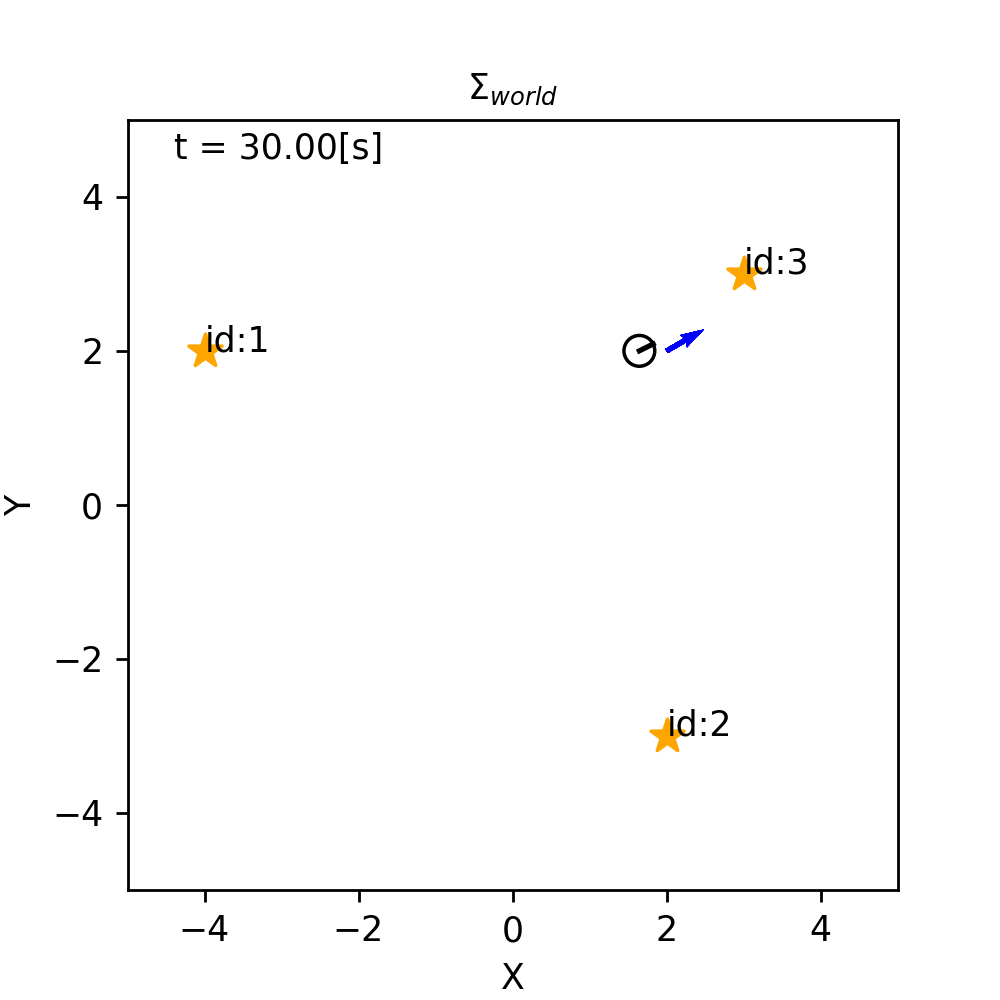

In [5]:
world = World(30, 0.1)  

### 地図を生成して3つランドマークを追加 ###
m = Map()                                  
m.append_landmark(Landmark(-4,2))
m.append_landmark(Landmark(2,-3))
m.append_landmark(Landmark(3,3))
world.append(m)          

### ロボットを作る ###
initial_pose = np.array([2, 2, math.pi/6]).T
circling = MclAgent(0.2, 10.0/180*math.pi, initial_pose)  #initial_poseを追加  
r = Robot(initial_pose, sensor=Camera(m), agent=circling) 
world.append(r)

### アニメーション実行 ###
world.draw()

In [6]:
r.agent.mcl.particles[0].pose

array([ 2.        ,  2.        ,  0.52359878])